# Import Modules

In [5]:
# %pip install fastai
# %pip install torchsummary

In [6]:
import numpy as np
from fastai import *
from fastai.vision.all import *
from fastai.callback.all import *
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Data Paths

In [8]:
datasetDir = r'Dataset/classification'

# Importing All Models

In [9]:
# ResNet
resnet50 = models.resnet50

# MobileNet
mobilenet_v2 = models.mobilenet_v2
mobilenet_v3_large = models.mobilenet_v3_large

# DenseNet
densenet161 = models.densenet161
densenet201 = models.densenet201

# Inception
inception_v3 = models.inception_v3

# Debug

In [17]:
learn = models.resnet50()

learn.summary()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Common Functions

In [13]:
def load_data(path='', train='train', valid='valid', test='', size=(224,224), bs=128):
    np.random.seed(42)
    data = ImageDataLoaders.from_folder(
        path=datasetDir,
        train=train,
        valid=valid,
        item_tfms=Resize(size),
        batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)],
        bs=bs,
        num_workers=4
    )
    return data

In [14]:
def l_learner(data, model, wd=0.1, metrics=[error_rate, accuracy, Precision(average='macro'), Recall(average='macro'), FBeta(average='macro', beta=1.0)], bnf=True, bnWd=False):
    learn = vision_learner(data, model, metrics=metrics, wd=wd, bn_final=bnf, wd_bn_bias=bnWd)
    return learn

In [15]:
def lRatefind(learn):
    learn.lr_find()
    learn.recorder.plot_lr_find()

# ResNet 50

In [16]:
data = load_data()

In [17]:
learn = l_learner(data,resnet50)

In [19]:
lRatefind(learn)

OutOfMemoryError: CUDA out of memory. Tried to allocate 50.00 MiB. GPU 0 has a total capacity of 7.74 GiB of which 52.19 MiB is free. Including non-PyTorch memory, this process has 7.26 GiB memory in use. Of the allocated memory 7.01 GiB is allocated by PyTorch, and 94.75 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [12]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,fbeta_score,time


/home/viper/anaconda3/envs/ml/lib/python3.12/site-packages/fastai/learner.py:448: SyntaxWarning: invalid escape sequence '\R'
  e.args = [f"Custom classes or functions exported with your `Learner` not available in namespace.\Re-declare/import before loading:\n\t{e.args[0]}"]


KeyboardInterrupt: 

In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,fbeta_score,time
0,1.146509,0.928930,0.149320,0.850680,0.854024,0.850680,0.848258,01:46
1,0.873412,0.776676,0.113946,0.886054,0.889538,0.886054,0.885367,01:42


In [ ]:
learn.unfreeze()

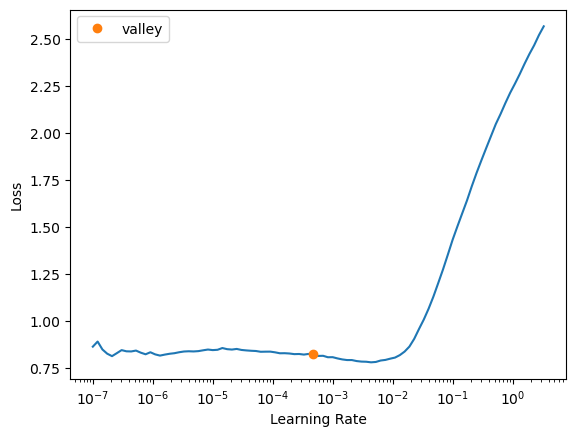

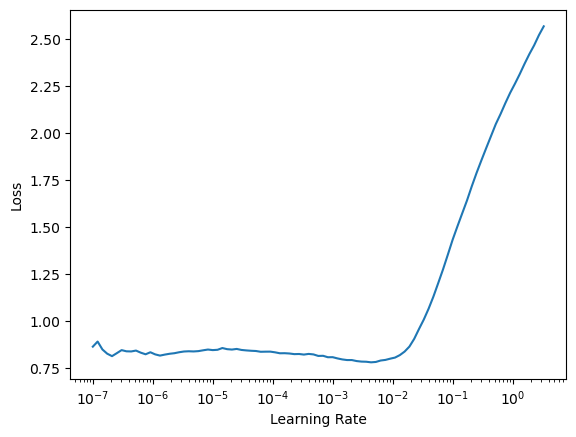

In [ ]:
lRatefind(learn)

In [14]:
learn.fit_one_cycle(
    10,
    slice(1e-4, 1e-3),
    pct_start=0.8,
    cbs=[
        SaveModelCallback(monitor='accuracy', fname='resnet50'),
        ReduceLROnPlateau(monitor='accuracy', patience=10, min_delta=0.05)
    ]
)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,fbeta_score,time
0,0.728793,0.567300,0.078912,0.921088,0.923108,0.921088,0.920725,01:55
1,0.590911,0.368713,0.046259,0.953741,0.955301,0.953741,0.953592,01:56
2,0.438271,0.207070,0.025170,0.974830,0.976980,0.974830,0.974959,01:56
3,0.321333,0.114288,0.012585,0.987415,0.987940,0.987415,0.987462,01:55
4,0.272591,0.092668,0.010884,0.989116,0.989396,0.989116,0.989118,01:55
5,0.231975,0.089125,0.014626,0.985374,0.986644,0.985374,0.985244,01:55
6,0.211985,0.097382,0.019048,0.980952,0.983042,0.980952,0.980926,01:55
7,0.170729,0.139994,0.022789,0.977211,0.982019,0.977211,0.976483,01:55
8,0.127153,0.039742,0.006122,0.993878,0.994047,0.993878,0.993879,01:55
9,0.078344,0.019405,0.003061,0.996939,0.997032,0.996939,0.996944,01:56


Better model found at epoch 0 with accuracy value: 0.921088457107544.
Better model found at epoch 1 with accuracy value: 0.9537414908409119.
Better model found at epoch 2 with accuracy value: 0.974829912185669.
Better model found at epoch 3 with accuracy value: 0.9874149560928345.
Better model found at epoch 4 with accuracy value: 0.9891156554222107.
Better model found at epoch 8 with accuracy value: 0.9938775300979614.
Better model found at epoch 9 with accuracy value: 0.9969387650489807.


In [ ]:
learn.export("resnet50_export.pkl")

# MobileNet

In [5]:
data = load_data()

In [19]:
print("Train Dataset:", data.train_ds)
print("Validation Dataset:", data.valid_ds)
print("Batch Size:", data.bs)

Train Dataset: (#11774) [(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0))...]
Validation Dataset: (#2940) [(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILIm

In [11]:
learn = l_learner(data,densenet161)

NameError: name 'l_learner' is not defined

In [9]:
lRatefind(learn)

KeyboardInterrupt: 

In [10]:
learn.fit_one_cycle(2)

KeyboardInterrupt: 

In [12]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,fbeta_score,time
0,0.896216,0.576272,0.091497,0.908503,0.911612,0.908503,0.907892,54:10


In [ ]:
learn.unfreeze()

In [ ]:
lRatefind(learn)

In [ ]:
learn.fit_one_cycle(
    10,
    slice(1e-4, 1e-3),
    pct_start=0.8,
    cbs=[
        SaveModelCallback(monitor='accuracy', fname='resnet152'),
        ReduceLROnPlateau(monitor='accuracy', patience=10, min_delta=0.05)
    ]
)

In [ ]:
learn.export("resnet152_export.pkl")